# 第6章 划分画布的主要函数

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## 6.1 函数subplot(): 绘制网格区域中的几何形状相同的子区布局
函数subplot的调用方法可以为subplot(numRows, numCols, plotNum)也可以用subplot(RCN)调用，这个指令会将画布(figure)划分成R行C列总共RC块区域，其返回的子区将被放置在第N个位置。

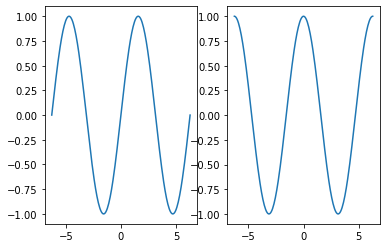

In [2]:
x = np.linspace(-2*np.pi,2*np.pi,200)
y = np.sin(x)
y1 = np.cos(x)

plt.subplot(121)
plt.plot(x,y)

plt.subplot(122)
plt.plot(x,y1)

plt.show()

子区函数subplot的原型为
<br>**subplot**(nrows,ncols,index,\*\*kwargs)，其中常见的参数(kwargs中的)有
<br>projection: 子区的投影方式，matplotlib自带的可选值有None,'aitoff','hammer','lambert','mollweide','polar','rectilinear'等
<br>polar: Bool型变量，如果为True相当于projection='polar'
<br>sharex,sharey: Axes对象，共享该Axes的x轴(或y轴)
<br>label: 字符串变量，返回Axes对象的标签
<br>其他参数为Axes类的属性

### 6.1.2 案例1 -- 在极坐标轴上绘制折线图

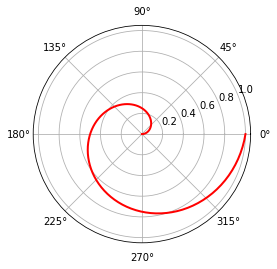

In [4]:
radii = np.linspace(0,1,100)
theta = 2*np.pi*radii

ax = plt.subplot(111,polar=True)
ax.plot(theta,radii,color='r',ls='-',lw=2)
plt.show()

### 6.1.3 案例2 -- 在极坐标轴上绘制散点图

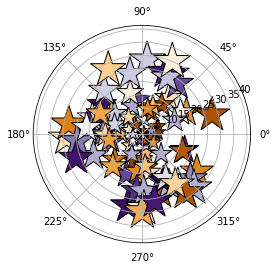

In [5]:
radii = 30*np.random.rand(100)
theta = 2*np.pi*np.random.rand(100)
colors = np.random.rand(100)
size = 50*radii

ax = plt.subplot(111,polar=True)
ax.scatter(theta,radii,s=size,c=colors,cmap='PuOr',marker='*',ec='black')

plt.show()

### 6.1.4 案例3 -- 在非等分画布的绘图区域上实现图形展示

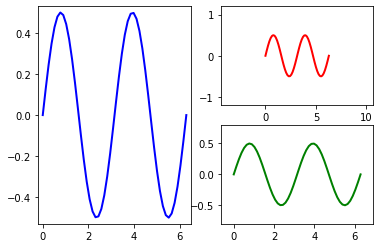

In [6]:
fig = plt.figure()

x = np.linspace(0.0,2*np.pi)
y = np.cos(x)*np.sin(x)

ax1 = fig.add_subplot(121)
ax1.margins(0.03)
ax1.plot(x,y,ls='-',lw=2,color='b')

ax2 = fig.add_subplot(222)
ax2.margins(0.7,0.7)
ax2.plot(x,y,ls='-',lw=2,color='r')

ax3 = fig.add_subplot(224)
ax3.margins(x=0.1,y=0.3)
ax3.plot(x,y,ls='-',lw=2,color='g')

plt.show()

Axes.margins方法用于设置空白范围，其函数为
<br>**margins**(\*margins,x=None,y=None,tight=True)
<br>\*margins: 浮点型或列表，如果为单一数值则为两个轴边界相同，如果为二元元组则分别对应x轴和y轴。函数将在数据间隔两侧分别添加margin倍数据间隔的空白区域，所有数值范围为\[0,1\]
<br>x,y: 分别确定两个轴的margin取值，这个参数与margins参数只可设置一个

## 6.2 函数subplot2grid() -- 让子区跨越固定的网格布局
### 6.2.1 函数subplot2grid()的使用方法

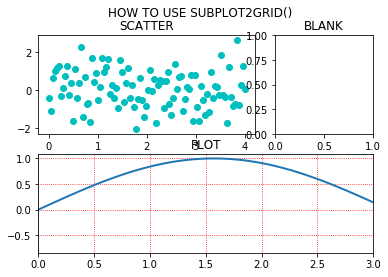

In [2]:
# set subplot(23,1-2)
plt.subplot2grid((2,3),(0,0),colspan=2)
x = np.linspace(0.0,4.0,100)
y = np.random.randn(100)
plt.scatter(x,y,c='c')
plt.title('SCATTER')

# set subplot(233)
plt.subplot2grid((2,3),(0,2))
plt.title('BLANK')

# set subplot(23,4-6)
plt.subplot2grid((2,3),(1,0),colspan=3)
x = np.linspace(0.0,4.0,100)
y1 = np.sin(x)
plt.plot(x,y1,lw=2,ls='-')
plt.xlim(0,3)
plt.grid(True,ls=':',c='r')
plt.title('PLOT')

plt.suptitle('HOW TO USE SUBPLOT2GRID()')

plt.show()

函数subplot2grid是pyplot下的一个方法，将整个画布划分成指定数目行和列，根据划分的网格生成框架
**subplot2grid**(shape,loc,rowspan=1,colspan=1,fig=None,\*\*kwargs)
<br>shape: 二元数组，代表将整个画布划分成x行,y列
<br>loc: 二元数组，框架起始位置，索引从0开始
<br>rowspan: 整数，框架所占的行数； colspan：整数，框架所占的列数
<br>\*\*kwargs: 其他传入add_subplot()中的参数

### 6.2.2 延伸阅读 - 模块gridspec中的类GridSpec的使用方法

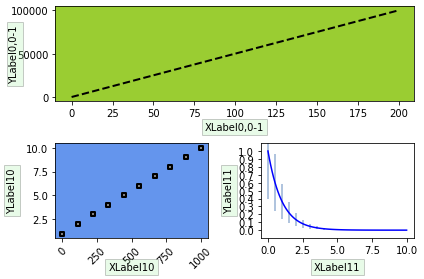

In [2]:
from matplotlib.gridspec import GridSpec

fig = plt.figure()
gs = GridSpec(2, 2)

box = {"facecolor":"lightgreen",'pad':3,'alpha':0.2}

x1 = np.arange(0,1e5,500)
ax1 = fig.add_subplot(gs[0,:],facecolor='yellowgreen')
ax1.plot(x1,'k--',lw=2)
ax1.set_ylabel('YLabel0,0-1',bbox=box)
ax1.set_xlabel('XLabel0,0-1',bbox=box)
ax1.yaxis.set_label_coords(-0.1,0.5)

x2 = np.linspace(0,1000,10)
y2 = np.arange(1,11,1)
ax2 = fig.add_subplot(gs[1,0],facecolor='cornflowerblue')
ax2.scatter(x2,y2,s=20,c='grey',marker='s',lw=2,edgecolors='k')
ax2.set_ylabel("YLabel10",bbox=box)
ax2.set_xlabel("XLabel10",bbox=box)
for ticklabel in ax2.get_xticklabels():
    ticklabel.set_rotation(45)
ax2.yaxis.set_label_coords(-0.25,0.5)
ax2.xaxis.set_label_coords(0.5,-0.25)

x3 = np.linspace(0,10,100)
y3 = np.exp(-x3)
ax3 = fig.add_subplot(gs[1,1])
ax3.errorbar(x3,y3,fmt='b-',yerr=0.6*y3,ecolor='lightsteelblue',
             elinewidth=2,capsize=0,errorevery=5)
ax3.set_ylabel("YLabel11",bbox=box)
ax3.set_xlabel("XLabel11",bbox=box)
ax3.xaxis.set_label_coords(0.5,-0.25)
ax3.set_ylim(-0.1,1.1)
ax3.set_yticks(np.arange(0,1.1,0.1))

gs.tight_layout(fig)

plt.show()